# Ingeniería de Características




In [1]:
!pip install --quiet mglearn
!pip install scikit-learn==1.1.3
#
# importación
#
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt

import numpy as np
import numpy.random as rng

import os
import pandas as pd
import mglearn

mpl.rcParams['figure.dpi']  = 100
mpl.rcParams['savefig.dpi'] = 150

mpl.rcParams['font.size']        = 10
mpl.rcParams['legend.fontsize']  = 'medium'
mpl.rcParams['figure.titlesize'] = 'medium'



## Tipos de características

Vamos a aprovechar en este módulo para trabajar un poco con **Pandas**.
Pandas es un paquete para trabajar con datos a _alto invel_, es decir que incorpora abstracciones más allá de simples matrices y vectores de  números.

En ese sentido, Pandas replica (y amplía) el tipo de abstracciones que son nativas en el lenguaje R: tablas, columnas y filas con nombre, tipos de datos, etc.

Pandas es un proyecto grande y muy activo mantenido por gente de Google, de muy alta calidad, bien documentado.

Vamos a trabajar ahora en Pandas con un conjunto de datos creado por los autores del libro del curso. Se trata de predecir el ingreso anual de una persona en base a distintas características: algunas numéricas, otras categóricas.



In [2]:

#
# el archivo no tiene nombres en las columnas
# se lo damos manualmente nosotros
#
nombres = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
'marital-status', 'occupation', 'relationship', 'race', 'gender',
'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
'income']

adult_path = os.path.join(mglearn.datasets.DATA_PATH, "adult.data")
data       = pd.read_csv(adult_path, header=None, index_col=False, names=nombres)
#
# mostramos sólo algunas de las columnas
#
data = data[['age', 'workclass', 'education', 'gender', 'hours-per-week',
'occupation', 'income']]
#
# la función display permite mostrar la tabla con algo de gracia en el Notebook
#
display(data.head())


,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


## One-Hot Encoding

Vamos a convertir las variables categóricas como _gender_, _workclass_, etc., usando one-hot encoding. La manera de hacer esto en Pandas es mediante la función `get_dummies`. El nombre no es muy intutivo, en especial para gente que no es de habla inglesa (dummy se utiliza para llamar _bobo_ en inglés a otra persona). La traducción más razonable sería _variables auxiliares_.

Recordemos que one-hot encoding transforma una variable categórica con $n$ valoers posibles en $n$ variables binarias. Dado un dato $x=i$, las variables auxiliares  valen todas $0$ salvo la $i$-ésima, que vale $1$.

La función `get_dummies` hace esto y le pone nombres razonables a las variables auxiliares, derivados del nombre de la variable original, y la categoría que cáda variable auxiliar representa.




In [3]:
print("Antes de codificar:")
for n in data.columns:
  print("\t",n)
#
# one-hot encoding usando Pandas
#
data_onehot = pd.get_dummies(data)
#
# a ver qué sale
#
print("\nLuego de codificar:")
for n in data_onehot.columns:
  print("\t",n)


Antes de codificar:
	 age
	 workclass
	 education
	 gender
	 hours-per-week
	 occupation
	 income

Luego de codificar:
	 age
	 hours-per-week
	 workclass_ ?
	 workclass_ Federal-gov
	 workclass_ Local-gov
	 workclass_ Never-worked
	 workclass_ Private
	 workclass_ Self-emp-inc
	 workclass_ Self-emp-not-inc
	 workclass_ State-gov
	 workclass_ Without-pay
	 education_ 10th
	 education_ 11th
	 education_ 12th
	 education_ 1st-4th
	 education_ 5th-6th
	 education_ 7th-8th
	 education_ 9th
	 education_ Assoc-acdm
	 education_ Assoc-voc
	 education_ Bachelors
	 education_ Doctorate
	 education_ HS-grad
	 education_ Masters
	 education_ Preschool
	 education_ Prof-school
	 education_ Some-college
	 gender_ Female
	 gender_ Male
	 occupation_ ?
	 occupation_ Adm-clerical
	 occupation_ Armed-Forces
	 occupation_ Craft-repair
	 occupation_ Exec-managerial
	 occupation_ Farming-fishing
	 occupation_ Handlers-cleaners
	 occupation_ Machine-op-inspct
	 occupation_ Other-service
	 occupation_ Priv-h



Ahora que tenemos variables numéricas podemos trabajar con métodos que ya vimos, como la regresión logística:



In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
#
# las características y el valor objetivo (el ingreso)
# están todas juntas en lo datos. Tenemos que separarlos.
#
# esto de abajo es una función de Pandas que hace un _slice_
# tomando las columnas desde 'age' hasta 'occupation_ Transport-moving' inclusive
# como características...
#
# NOTA: en el libro aparece 'ix' en lugar de 'loc'
#       esa notación es obsoleta y NO FUNCIONA.
#
features = data_onehot.loc[:, 'age':'occupation_ Transport-moving']
#
# y la última es el objetivo
#
target = data_onehot['income_ >50K']
#
# ahora extraemos de adentro de las tablas la información numérica
# (matrices de NumPy) para poder trabajar con sklearn
#
X = features.values
y = target.values
#
#
n,m = X.shape
print(f"cantidad de muestras {n}\ndimensión {m}")
#
#
# dividimos datos en entrenamiento y test
#
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
#
# creamos modelo
#
model = LogisticRegression(max_iter=2000)
#
# y lo ajustamos a los datos
#
model.fit(X_train, y_train)
#
# y vemos su desempeño
#
score = model.score(X_test, y_test)
print(f"score: {score:0.2f}")

cantidad de muestras 32561
dimensión 44
score: 0.81


## Transformación y creación de Características

Posiblemente la tarea que tradicionalmente implica más ingenio y experiencia es la de crear y transformar las características _crudas_ que tenemos de manera de expresar relaciones no triviales entre ellas.

No hay una receta universal para hacer esto, pero sí algunos escenarios comunes en donde suelen ser efectivas algunas estrategias.

### Funciones suaves, no lineales

Siempre que se va a trabajar sobre un problema conviene dedicar un tiempo a explorar y observar los datos.

Si, por ejemplo, lo que tenemos que aproximar es una función _suave_, podemos intentar hacer una regresión polinomial. En términos de características, esto equivale a hacer una regresión _lineal_ sobre un conjunto de varabies auxiliares: los _monomios_ correspondientes a las variables originales. Es decir, si tenemos una sóla variable $x$ y una salida $y$ que queremos estimar como polinomio de $x$ de orden $p$, creamos $p$ variables auxiliares:

$$x \rightarrow (x,x^2,x^3,\ldots,x^p).$$

Es común incluir un $1$ como característica (puede pensarse como $x^0=1$). Esto permite aprender el término independiente del polinomio:


$$x \rightarrow (1,x,x^2,x^3,\ldots,x^p).$$


En el Módulo 2 vimos cómo hacer esto _a mano_. Resulta que `sklearn` ya incorpora una función para realizar esta transformación por nosotros.
Veámoslo en el siguiente ejemplo.

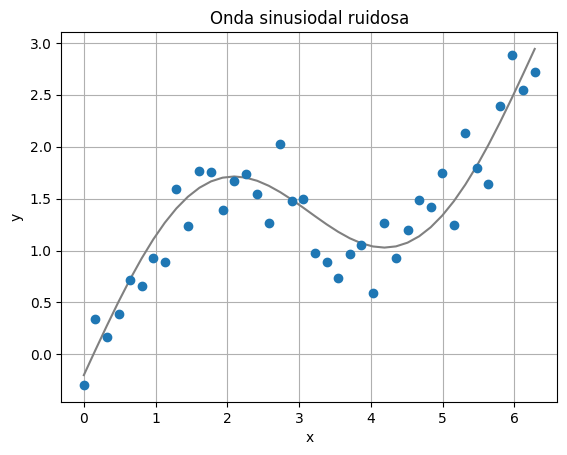

SCORE:0.75


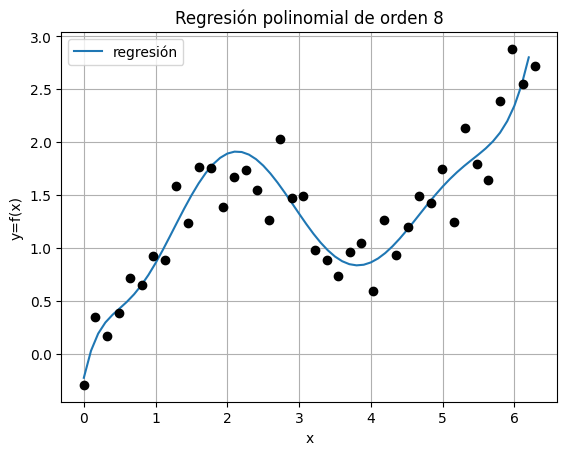

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
#
# lo de abajo es una réplica casi idéntica  del código del práctico 2.1 para simular una función
# no lineal.
#
# en ese caso teníamos una onda sinusoidal con ruido
# ahora, para hacerlo más interesante, le agramos una componente _lineal_, es decir
# que ahora la función a aproximar es
#
# f(x) = a*sen(wx) + b*x + c
#
def onda_ruidosa(num_muestras,amplitud=1,frecuencia=1,fase=0,ruido=0,constante=0,deriva=0,semilla=44441111):
  '''
  genera muestras de una onda sinusoidal de amplitud, frecuencia y fase
  deseadas, con una cantidad de ruido específica
  '''
  rng.seed(semilla)
  X = np.ones((num_muestras,1))
  X = np.linspace(0,2*np.pi,num=num_muestras)
  y = amplitud*np.sin(frecuencia*X+fase) + deriva*X + constante + ruido*rng.randn(num_muestras)
  X = X.reshape(1,-1).T # detalle técnico oscuro y que no aporta nada
  return X,y

#
# generamos algunas muestras
#
N = 40
X, ytilde = onda_ruidosa(num_muestras=N,ruido=0.0,deriva=0.5,constante=-0.2)
X, y      = onda_ruidosa(num_muestras=N,ruido=0.3,deriva=0.5,constante=-0.2)

plt.plot(X, ytilde, '-',color=(0.5,0.5,0.5,1.0))
plt.plot(X, y, 'o')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Onda sinusiodal ruidosa")
plt.grid(True)
#plt.savefig('onda_ruidosa.png')
plt.show()
#
# separamos datos en entrenamiento y validación:
#
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#
# creamos el preprocesador que convierte x a  monomios hasta orden 10 y término independiente
# incluido  (característica constante = 1)
#
# esto se logra con "include_bias=True"
#
preproc = PolynomialFeatures(degree=8, include_bias=False)
#
# "fit" en este caso no hace mucho (el nombre es por consistencia, pero no
# hay ajuste alguno que hacer acá)
#
preproc.fit(X_train)
#
# aquí sí que se transforma finalmente x en x_poly = (1,x,x^2...)
#
X_train_poly = preproc.transform(X_train)
X_test_poly = preproc.transform(X_test)

#print(X)
#print(X_poly)
#
# ahora sí, hacemos el ajuste
#
line = np.arange(0,2*np.pi,step=0.1).reshape(1,-1).T
modelo = LinearRegression().fit(X_train_poly, y_train)
score = modelo.score(X_test_poly,y_test)
print(f"SCORE:{score:0.2f}")

line_poly = preproc.transform(line)
y_poly = modelo.predict(line_poly)
plt.plot(line, y_poly, label='regresión')
plt.plot(X[:, 0], y, 'o', c='k')
plt.title('Regresión polinomial de orden 8')
plt.ylabel("y=f(x)")
plt.xlabel("x")
plt.legend(loc="best")
plt.grid(True)
plt.show()

## Otras transformaciones comunes

Además de polinomios, que son un mecanismo general para ajustar funciones _suaves_ (que no tienen saltos abruptos), existen otras que pueden ser adecuadas a escenarios particulares:

*   Funciones con periodicidad (ej., diaria, semanal, mensual, anual): sinusoides: $x \rightarrow \mathrm{sen}(\theta x + \phi)$
*   Funciones de crecimiento rápido: $x \rightarrow e^x$
*   Funciones de crecimiento lento: $x \rightarrow 1/x^\alpha$, o también $x \rightarrow \log x$, o también $x \rightarrow \sqrt{x}$ \ldots

En el caso anterior, si supiéramos de antemano que la función contiene una sinusoide, incorporaríamos un término de la forma $\mathrm{sen}(x)$ a la regresión. En este caso estamos haciendo trampa, pero el hecho es que muchas veces sabemos este tipo de información de antemano. El siguiente ejemplo entonces ilustra la importancia de incorporar conocimiento apriori del problema en nuestro modelo para mejorar los resultados:



SCORE:0.90


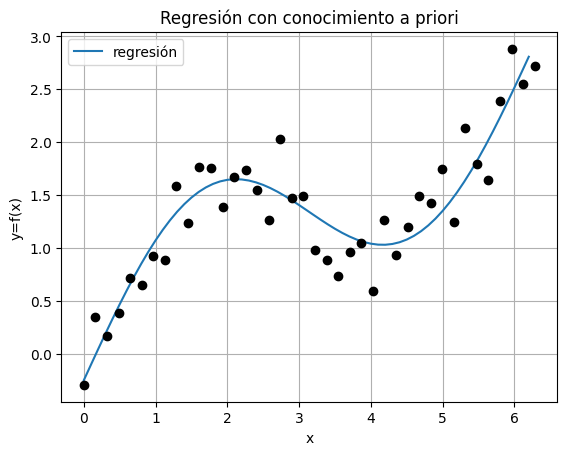

In [6]:
def mapeo_justo(X):
  #
  # hstack = horizontal stack = apilar en sentido horizontal
  # esta función toma varias matrices y las pone una al lado de la otra
  # en nuestro caso:
  # la primera columna es un 1 (para término indep)
  # la segunda es X
  # la tercera columna es sen(X)
  #
  return np.hstack((np.ones(X.shape),X,np.sin(X)))

line = np.arange(0,2*np.pi,step=0.1).reshape(1,-1).T

X_train_justo = mapeo_justo(X_train)
X_test_justo = mapeo_justo(X_test)
line_justo = mapeo_justo(line)


modelo  = LinearRegression().fit(X_train_justo, y_train)
y_justo = modelo.predict(line_justo)

score = modelo.score(X_test_justo,y_test)
print(f"SCORE:{score:0.2f}")

plt.plot(line, y_justo, label='regresión')
plt.plot(X[:, 0], y, 'o', c='k')
plt.title('Regresión con conocimiento a priori')
plt.ylabel("y=f(x)")
plt.xlabel("x")
plt.legend(loc="best")
plt.grid(True)
plt.show()

## Polinomios en varias variables

Cuando la entrada consta de más de una variable,  el preprocesador `PolynomialFeatures` genera monomios con _todas_ las combinaciones de esas variables hasta el orden deseado. Por ejemplo, si tenemos dos entradas $(x,z)$, y queremos un polinomio de orden $2$, el mapeo es:

$$(x,z) \rightarrow (1,x,z,x^2,xz,z^2)$$

Hay que tener cuidado, porque la cantidad de monomios crece rápidamente con la cantidad de características de entrada, incluso para polinomios de orden bajo.
Veamos ahora el ejemplo de libro, que predice valores de casas a partir de distintas características, todas numéricas:



In [8]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
#
# datos de precios de casas en Boston de hace no sé cuántos años atrás
#
boston = load_boston()
#
# lo de siempre: dividir en entrenamiento y validación
#

X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)
#
# preprocesamiento 1) reescalar los datos
#
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
#
# preprocesamiento 2) polinomio de orden 2
# esto genera 105 características a partir de las 13 que teníamos!
#
poly = PolynomialFeatures(degree=2,include_bias=True).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
print("nuevas características:")
for name in poly.get_feature_names():
  print("\t",name)


nuevas características:
	 1
	 x0
	 x1
	 x2
	 x3
	 x4
	 x5
	 x6
	 x7
	 x8
	 x9
	 x10
	 x11
	 x12
	 x0^2
	 x0 x1
	 x0 x2
	 x0 x3
	 x0 x4
	 x0 x5
	 x0 x6
	 x0 x7
	 x0 x8
	 x0 x9
	 x0 x10
	 x0 x11
	 x0 x12
	 x1^2
	 x1 x2
	 x1 x3
	 x1 x4
	 x1 x5
	 x1 x6
	 x1 x7
	 x1 x8
	 x1 x9
	 x1 x10
	 x1 x11
	 x1 x12
	 x2^2
	 x2 x3
	 x2 x4
	 x2 x5
	 x2 x6
	 x2 x7
	 x2 x8
	 x2 x9
	 x2 x10
	 x2 x11
	 x2 x12
	 x3^2
	 x3 x4
	 x3 x5
	 x3 x6
	 x3 x7
	 x3 x8
	 x3 x9
	 x3 x10
	 x3 x11
	 x3 x12
	 x4^2
	 x4 x5
	 x4 x6
	 x4 x7
	 x4 x8
	 x4 x9
	 x4 x10
	 x4 x11
	 x4 x12
	 x5^2
	 x5 x6
	 x5 x7
	 x5 x8
	 x5 x9
	 x5 x10
	 x5 x11
	 x5 x12
	 x6^2
	 x6 x7
	 x6 x8
	 x6 x9
	 x6 x10
	 x6 x11
	 x6 x12
	 x7^2
	 x7 x8
	 x7 x9
	 x7 x10
	 x7 x11
	 x7 x12
	 x8^2
	 x8 x9
	 x8 x10
	 x8 x11
	 x8 x12
	 x9^2
	 x9 x10
	 x9 x11
	 x9 x12
	 x10^2
	 x10 x11
	 x10 x12
	 x11^2
	 x11 x12
	 x12^2


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

## Regularización al rescate

Aquí aprovechamos para traer de nuevo al tema de la regularización.
En el caso que estamos viendo, incluso con el polinomio no trivial de orden más bajo posible ($p=2$), tenemos una explosión de variables, con la consiguiente explosión de parámetros del modelo y por ende del riesgo de sobreajuste.

Si queremos poder capturar relaciones complejas _y_ evitar un sobreajuste, podemos echar mano a la regularización. Abajo vemos cuatro escenarios en donde queda clara la ventaja de hacerlo:

1.   regresión lineal sobre características originales
1.   regresión lineal sobre polinomio de orden 2
1.   regresión regularizada con Ridge sobre pol. de orden 2
1.   regresión regularizada con Lasso sobre pol. de orden 2

Vamos al lío:

In [9]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso

#
# probemos con regresión lineal sin regularizar
# sobre los datos originales
#
lsq = LinearRegression().fit(X_train_scaled,y_train)
lsq_score = lsq.score(X_test_scaled,y_test)
print(f"lineal/orig: {lsq_score:0.2f}")
#
# probemos con regresión lineal sin regularizar
# sobre los datos transformados
#
lsq_poly = LinearRegression().fit(X_train_poly,y_train)
lsq_poly_score = lsq_poly.score(X_test_poly,y_test)
print(f"lineal/poly: {lsq_poly_score:0.2f}")
#
# ahora con regularización (Ridge)
#
ridge_poly = Ridge().fit(X_train_poly,y_train)
ridge_poly_score = ridge_poly.score(X_test_poly,y_test)
print(f"ridge /poly: {ridge_poly_score:0.2f}")
#
# ahora con regularización (Lasso)
#
lasso_poly = Lasso(alpha=5e-3,max_iter=10000).fit(X_train_poly,y_train)
lasso_poly_score = lasso_poly.score(X_test_poly,y_test)
print(f"lasso /poly: {lasso_poly_score:0.2f}")


lineal/orig: 0.64
lineal/poly: 0.61
ridge /poly: 0.75
lasso /poly: 0.78


# Selección automática de características

No siempre tener muchas características es bueno. Como vimos, tener demasiadas características en cuenta en un modelo puede tornarlo innecesariamente complejo; puede confundirlo; puede volverlo más fragil a variaciones superfluas en los valores de algunas de ellas.

A veces es un dato de la realidad. A veces tenemos muy poca información a priori y deseamos experimentar con distintas relaciones entre las variables. El ejemplo de mapeo polinomial anterior es uno bien claro: de $13$ características originales saltamos a $105$.

El objetivo que nos planteamos ahora es el camino inverso: cómo seleccionar un subconjunto de características relevantes al problema?  Más aún, cómo hacer esto _automáticamente_?

A continuación veremos distintas formas de hacer lo anterior.

## Datos experimentales

Para esta parte volvemos a los datos de Cancer de Mama que vimos anteriormente, en donde, por ejemplo, hicimos un análisis de la importancia relativa de las distintas variables en determinar la salida del clasificador. Lo que haremos a continuación está muy ligado a eso.

Para hacer el problema más interesante en lo que respecta a la selección, vamos a _contaminar_ los datos con unas cuantas variables _completamente aleatorias, no informativas_. Si todo sale bien, esas variables deberían ser descartadas automáticamente.

## Selección por significancia estadística (ANOVA)

Supongamos que tenemos $n$ muestras consistentes en $n$ medidas de $m$ características  $(x_1,\ldots,x_m)$ y una variable de interés $y$. En su formulación original de estadística tradicional, el análisis de varianza (ANOVA) busca responder la siguiente pregunta:

*   _varía significativamente $y$ respecto a $x_i$?_

La forma en que esto se realiza en la práctica es comparando la media muestral de $y$ tomada con respecto a _todos_ los datos contra las distintas medias obtenidas para distintos valores de $x_i$ (supongamos que $x_i$ puede tomar unos pocos valores distintos). La hipótesis nula es que _no hay diferencia_. Luego, bajo ciertas suposiciones sobre las distribuciones subyacentes, uno puede calcular qué tan probable es la hipótesis nula (lo que se denomina $p$-value) y rechazarla si el $p$-valor es suficientemente pequeño.

En nuestro contexto, podemos reutilizar la maquinaria anterior para decidir si una característica es relevante o no. En `sklearn` esto se realiza con dos funciones según el objetivo: para regresión, se usa `f_regression`, mientras que para clasificación se usa `f_classif`.



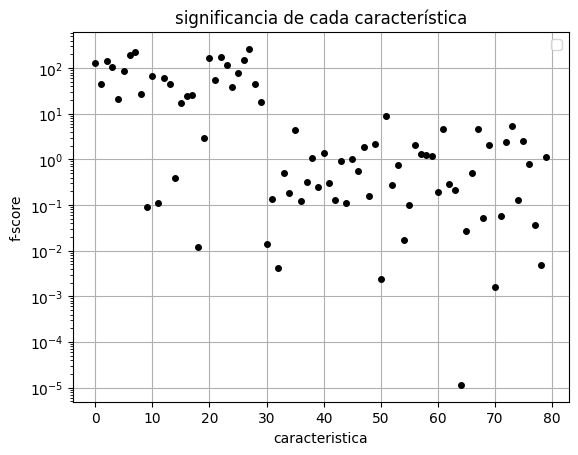

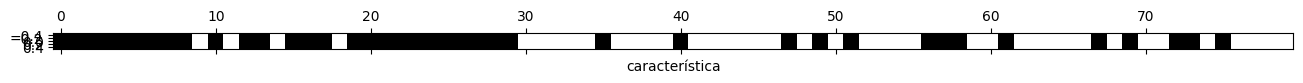

score con todas las caract.    : 0.937
score con caract. seleccionadas: 0.956


In [10]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import f_classif,SelectPercentile
from sklearn.model_selection import train_test_split

#
# deberes: responder por qué usamos tanto el '42'
#
def agregar_basura(X,m_basura=50,semilla=42):
  rng    = np.random.RandomState(42) # siempre los mismos datos pseudoaleatorios
  basura = rng.normal(size=(len(cancer.data), m_basura))
  return np.hstack((X, basura))
#
# datos de cancer
#
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
#
# agregamos basura
#
X_sucio = agregar_basura(X)


X_train, X_test, y_train, y_test = train_test_split(X_sucio, cancer.target, random_state=0, test_size=.75)
#
#
#
selector = SelectPercentile(percentile=50)
#
# veamos los p-valores resultantes
# mientras *más pequeño, más significativo*
# tradicionalmente, valores arriba de 0.05 se consideran poco
# significativos.
#
selector.fit(X_train,y_train)
scores = selector.scores_
plt.semilogy(scores,'ok',markersize=4)
plt.xlabel('caracteristica')
plt.ylabel('f-score')
plt.grid('True')
plt.title('significancia de cada característica')
plt.legend()
#
# elegimos aquellos que superan cierto umbral de significancia
#
X_train_sel = selector.transform(X_train)
X_test_sel  = selector.transform(X_test)
#
# vemos el soporte: en negro las que se usan, en blanco las que no
# se usan
#
plt.matshow(selector.get_support().reshape(1, -1), cmap='gray_r')
plt.xlabel("característica")
plt.show()

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train)
score_todo = lr.score(X_test, y_test)
print(f"score con todas las caract.    : {score_todo:.3f}")

lr.fit(X_train_sel, y_train)
score_sel = lr.score(X_test_sel, y_test)
print(f"score con caract. seleccionadas: {score_sel:.3f}")


## Selección directa basada en desempeño

Otra forma de seleccionar características es evaluar su impacto directo en el desempeño de un sistema de aprendizaje (no necesariamente _el_ mismo sistema; a veces se usa uno preliminar, sencillo y rápido).

Varios modelos de aprendizaje, en particular varios de los incluídos en `sklearn`, generan como información colateral del proceso de aprendizaje un vector de _medidas de relevancia_ de las distintas características.  Esto ya lo vimos en el caso de los árboles. También lo vimos en modelos de regresión como el _Lasso_.

La diferencia es que no necesariamente vamos a usar ese modelo en última instancia. El Lasso, por ejemplo, fue concebido como un mecanismo de _selección_ de características (Lasso viene de Least Absolute Shrinkage and Selection, Tibshirani 1998). Una vez seleccionado el soporte con Lasso, a veces
la estimación final de lo coeficientes de una regresión se hace usando mínimos cuadrados. Veamos esto


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


score con caract. seleccionadas: 0.930


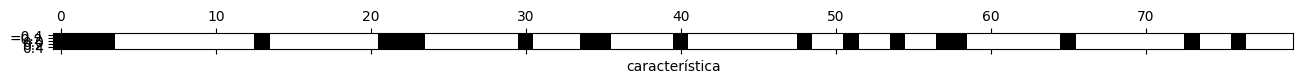

score con caract. sel. via LASSO: 0.944


In [11]:
lasso_logreg = LogisticRegression(max_iter=100000,penalty='l1',solver='liblinear',C=1,tol=1e-10)

lasso_logreg.fit(X_train, y_train)
score = lasso_logreg.score(X_test, y_test)
print(f"score con caract. seleccionadas: {score:.3f}")

comp_sig_llr = (np.abs(lasso_logreg.coef_) > 0)
plt.matshow(comp_sig_llr.reshape(1, -1), cmap='gray_r')
plt.xlabel("característica")
plt.show()

idx_significativos = np.flatnonzero(comp_sig_llr)
X_train_sel = X_train[:,idx_significativos]
X_test_sel  = X_test [:,idx_significativos]

lr.fit(X_train_sel, y_train)
score_sel = lr.score(X_test_sel, y_test)
print(f"score con caract. sel. via LASSO: {score_sel:.3f}")
